# Proto - Data Preparation & Exploration

참고 : https://www.kaggle.com/bertcarremans/data-preparation-exploration

# 1st

Loading packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer### importError로 변경
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_column',100)

Loading data

In [15]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# 1. Visual inspection of data

data 설명
- 유사한 그룹에 속한 feature들은 ind, reg, car, cals와 같이 변수 이름이 주어진다.
- 변수 이름엔 이진 변수를 나타내는 bin과 범주형 변수를 나타내는 cat이 있다.
- 이런 사항이 없는 변수는 연속형이거나 순서형이다.
- -1 값은 변수가 결측값이라는 것을 나타낸다.
- target 열은 정책 소유자에 대한 불만이 제기되었는지를 나타낸다.

위의 사항을 확인해보기 위해 데이터의 첫행과 마지막행을 살펴보자.

In [16]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [17]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


아래 사항들이 확인된다.
- 이진 변수
- 범주 값이 정수인 범주형 변수
- 정수 또는 실수값인 기타 변수
- 결측값인 -1가 있는 변수
- target 변수와 ID 변수

train data의 행과 열의 수를 확인해보자.

In [18]:
train.shape

(595212, 59)

59개 변수와 595212개의 행이 있다. test data도 변수의 수가 동일한지 확인해보자. 중복 데이터를 삭제한 후 train data를 확인해보자.

In [19]:
train.drop_duplicates()
train.shape

(595212, 59)

중복 데이터가 없다.

In [20]:
test.shape

(892816, 58)

test data의 변수 하나가 없는 것은 target 변수이기 때문에 괜찮다. 이제 각 유형의 변수의 수를 확인해보자. 나중에 14개의 범주형 변수에 대한 더미 변수를 만들 수 있다. bin 변수는 이미 이진이므로 더미화할 필요가 없다.

In [21]:
train.info

<bound method DataFrame.info of              id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_c

info()를 통해 데이터 유형을 확인할 수 있다. 확인한 결과 null값은 없다.

# 2. Defining Metadata

데이터 관리를 용이하게 하도록 변수에 대한 메타정보를 DataFrame 에 저장한다. 분석, 시각화, 모델링 등에서 특정 변수를 선택할 때 유용하다. <br>
다음과 같이 저장할 수 있다.
- role : input, ID, target
- level : nominal, interval, ordinal, binary
- keep : True or False
- dtype : int, float, str

In [40]:
data = []
for f in train.columns:
    # Role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else :
        role = 'input'
        
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # id 제외 모든 변수에 대해 keep 을 True로 초기화
    keep = True
    if f == 'id':
        keep = False
        
    # data type 정의
    dtype = train[f].dtype
    
    # 변수의 모든 메타데이터를 포함한 Dict 변수 생성
    f_dict = {'varname':f, 'role':role, 'level':level, 'keep':keep, 'dtype':dtype}
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [41]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


삭제되지 않은 모든 nominal 변수를 추출해보자.

In [42]:
meta[(meta.level=='nominal')&(meta.keep)].index  
### keep==True이면서(id가 아니면서 nominal인 변수 추출)

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

role 과 level 당 변수의 수 표시

In [43]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# 3. Descriptive statistics

우리는 dataframe에 describe 메소드를 적용할 수 있지만, 범주형 변수와 id 변수에 대해 평균, 표준편차 등을 계산하는 건 의미 없다. 나중에 시각적으로 범주형 변수를 살펴보자.
<br> meta를 통해 기술 통계량을 계산할 변수를 쉽게 선택할 수 있다. 데이터타입별로 확인해보자.

## 3.1. Interval variables (구간형 변수)

In [44]:
v = meta[(meta.level=='interval')&(meta.keep)].index
train[v].describe()   ### id가 아닌 interval 변수의 기술통계량 확인

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


- reg 변수 <br>
ps_reg_03에만 결측값 존재 <br> 
최대 최소간 범위가 다름 <br>
-> StandardScaler와 같은 스케일링을 적용할 수 있지만 사용할 분류기에 따라 다름
- car 변수 <br>
ps_car_12, ps_car_15에 결측값 존재 <br>
최대 최소간 범위가 다름 <br>
-> 스케일링 적용 가능
- calc 변수 <br>
결측값 없음 <br>
최대값이 모두 0.9이므로 어떤 비율인 것 같음 <br>
이 변수들의 분포가 매우 비슷

전체적으로, interval 변수의 범주가 작아보인다. log와 같은 변환이 이미 적용되었을 수도 있다.

## 3.2. Ordinal variables (순서형 변수)

In [46]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- ps_car_11에만 결측값 존재
- 스케일링을 적용해 다양한 범주를 처리할 수 있음

## 3.3. Binary  varibales (이진형 변수)

In [48]:
v = meta[(meta.level=='binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train data의 target의 평균이 0.0365 로 굉장히 불균형하다. 대부분의 target 값이 0인 것을 알 수 있다.

# 4. Handling embalanced classes

언급했듯이 target=1의 비율이 0보다 훨씬 적다. 따라서 정확도는 높지만 실제로 추가적인 값을 갖는 모델이 될 수 있다. 이 문제를 해결할 수 있는 두 가지 방법은 다음과 같다.
- target=1로 오버샘플링
- target=0으로 언더샘플링

train set이 크기 때문에 언더샘플링을 한다.

In [50]:
desired_apriori = 0.10 
### 현재 target=1 : target=0 비율은 약 0.03 : 0.97
### 언더샘플링을 통해 비율을 0.1 : 0.9 로 맞출 예정

# target값별 인덱스 구하기
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# target값별 레코드 수 구하기
nb_0 = len(train.loc[idx_0])  ### target==0인 train데이터 길이(개수)
nb_1 = len(train.loc[idx_1])

# target=0인 레코드의 언더샘플링 비율과 개수 구하기
undersampling_rate = ((1-desired_apriori)*nb_1) / (nb_0*desired_apriori)  ### target 개수 차이가 많이 나므로 가능한 언더샘플링 비율 구하기
undersampled_nb_0 = int(undersampling_rate*nb_0)  ### 언더샘플링 이후 target=0 데이터 개수
print('Rate to undersample recordes with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 원하는 apriori를 얻기 위해 target=0인 데이터 랜덤 선택
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)  ### 언더샘플링할 데이터 수만큼만 랜덤으로 추출

# 남은 인덱스에서 리스트 생성
idx_list = list(undersampled_idx) + list(idx_1)  ### 언더샘플링한 target=0 데이터와 원상태인 target=1 데이터의 인덱스 결합해 저장

# 언더샘플링한 데이터프레임 반환
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample recordes with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


# 5. Data Quality Checks

## 5.1. Checking missing values

결측값 = -1

In [53]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f]==-1][f].count()  ### 결측값 개수
    if missings>0:
        vars_with_missing.append(f)  ### 결측값 존재하는 변수 추가
        missings_perc = missings/train.shape[0]  ### 결측값 비율
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f,missings,missings_perc))
    
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- ps_car_03_cat, ps_car_05_cat은 결측값 비율이 크므로 변수 제거. 결측값이 있는 다른 범주형 변수는 결측값 -1을 남겨둘 수 있다.
- ps_reg_03(연속형)은 18%의 결측값이 있어 평균으로 대체
- ps_car_11(순서형)은 결측값이 5개뿐이므로 최빈값(mode)로 대체
- ps_car_12(연속형)은 결측값이 1개뿐이므로 평균으로 대체
- ps_car_14(연속형)은 7%의 결측값이 있어 평균으로 대체

In [69]:
# 결측값이 너무 많은 변수 제거
#vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
#train.drop(vars_to_drop, inplace=True, axis=1)
#meta.loc[(vars_to_drop),'keep'] = False  # meta 업데이트

# 평균이나 최빈값 대체
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')  ### SimpleImputer에 axis 매개변수 없어서 변경
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()  ### ravel : 다차원->1차원 배열 변환
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit(train[['ps_car_11']])  ### SimpleImputer에 ravel 적용 안 돼서 변경

## 5.2. Checking the cardinality of the categorical variables

카디널리티는 변수의 다양한 값의 수를 나타낸다. 나중에 범주형 변수에서 더미 변수를 만 들 것이므로 구별되는 값이 많은 변수가 있는지 확인해야한다. 이런 변수는 더미 변수를 너무 많이 만들 수 있으니 다르게 처리해야한다.

In [71]:
v = meta[(meta.level=='nominal')&(meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distict values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distict values
Variable ps_ind_04_cat has 3 distict values
Variable ps_ind_05_cat has 8 distict values
Variable ps_car_01_cat has 13 distict values
Variable ps_car_02_cat has 3 distict values
Variable ps_car_04_cat has 10 distict values
Variable ps_car_06_cat has 18 distict values
Variable ps_car_07_cat has 3 distict values
Variable ps_car_08_cat has 2 distict values
Variable ps_car_09_cat has 6 distict values
Variable ps_car_10_cat has 3 distict values
Variable ps_car_11_cat has 104 distict values


ps_car_11_cat이 distinct value가 많지만 괜찮다.

In [87]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

def add_noise(series,noise_level):
    return series*(1 + noise_level*np.random.randn(len(series)))


def target_encode(trn_series=None,tst_series=None,target=None,min_samples_leaf=1,smoothing=1,noise_level=0):
    # trn_series : train의 범주형 변수를 pd.Series로 변환
    # target : pd.Series의 target 데이터
    # min_samples_lear(int) : 범주의 평균을 얻는 최소 표본수  ### 클수록 가지치기, 작을수록 정확하지만 과대적합
    # smoothing(int) : 범주 평균과 이전 값의 균형을 맞추기 위한 효과
    
    assert len(trn_series) == len(target)  ### assert : 뒤의 조건이 True가 아니면 AssertError 발생시킴
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)  ### concat : 데이터프레임 결합, 여기선 train과 target 결합
    
    # target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])  ### agg : 그룹별 여러 함수 적용
    # smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages['count']-min_samples_leaf)/smoothing))
    
    # 모든 target 데이터에 평균 적용
    prior = target.mean()
    # count가 클수록 full_avg는 적게 고려됨
    averages[target.name] = prior*(1-smoothing) + averages['mean']*smoothing
    averages.drop(["mean","count"],axis=1,inplace=True)
    # train, test series에 평균 적용
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on=trn_series.name, how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    # pd.merge가 인덱스를 유지하지 않으므로 복원
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on=tst_series.name, how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    # pd.merge가 인덱스를 유지하지 않으므로 복원
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [88]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],test["ps_car_11_cat"], 
                                             target=train.target,min_samples_leaf=100,
                                            smoothing=10,noise_level=0.01)
train['ps_car_!1_cat_te'] = train_encoded
train.drop('ps_car_11_cat',axis=1,inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # meta 업데이트
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat',axis=1,inplace=True)

# 6. Exploratory Data Visualization

## 6.1. Categorical variables

범주형 변수와 target=1인 고객의 비율을 살펴보자.

<Figure size 432x288 with 0 Axes>

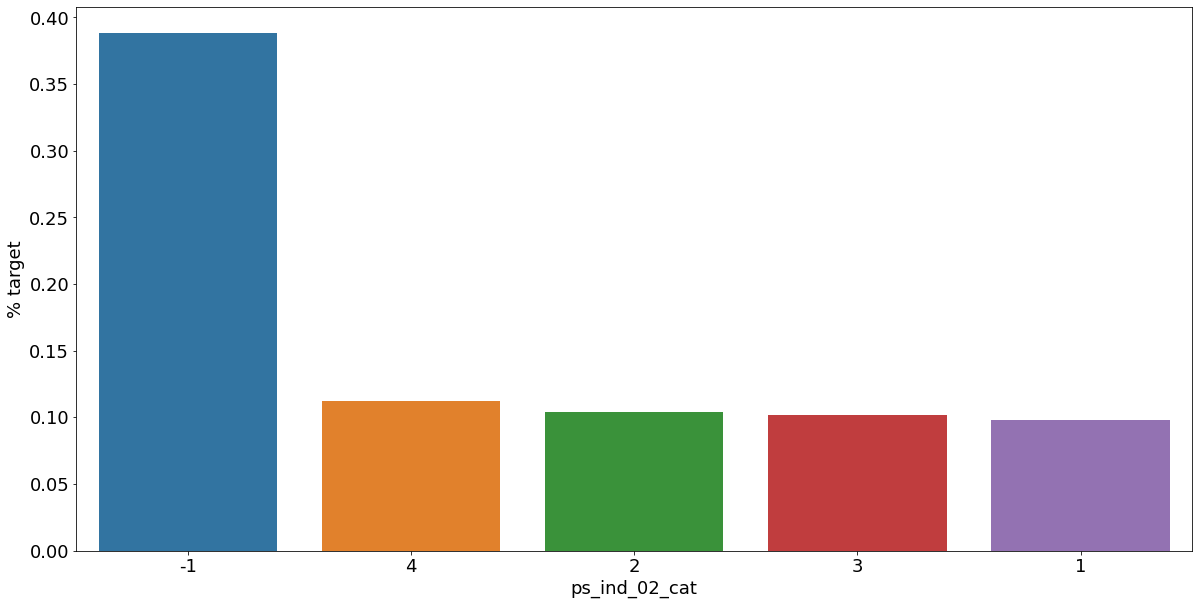

<Figure size 432x288 with 0 Axes>

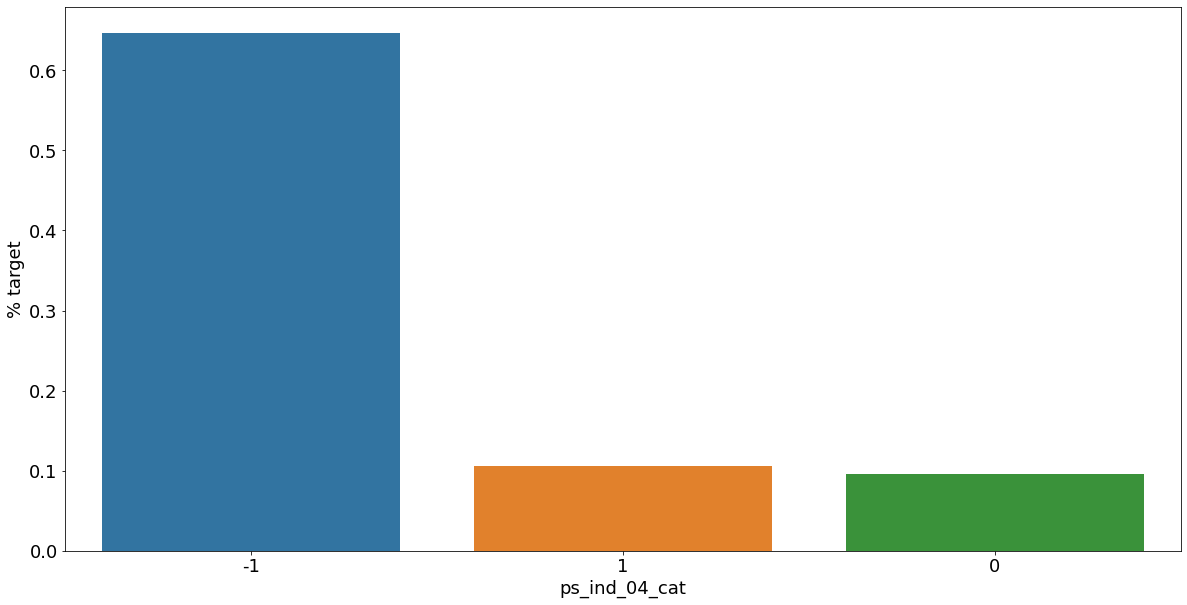

<Figure size 432x288 with 0 Axes>

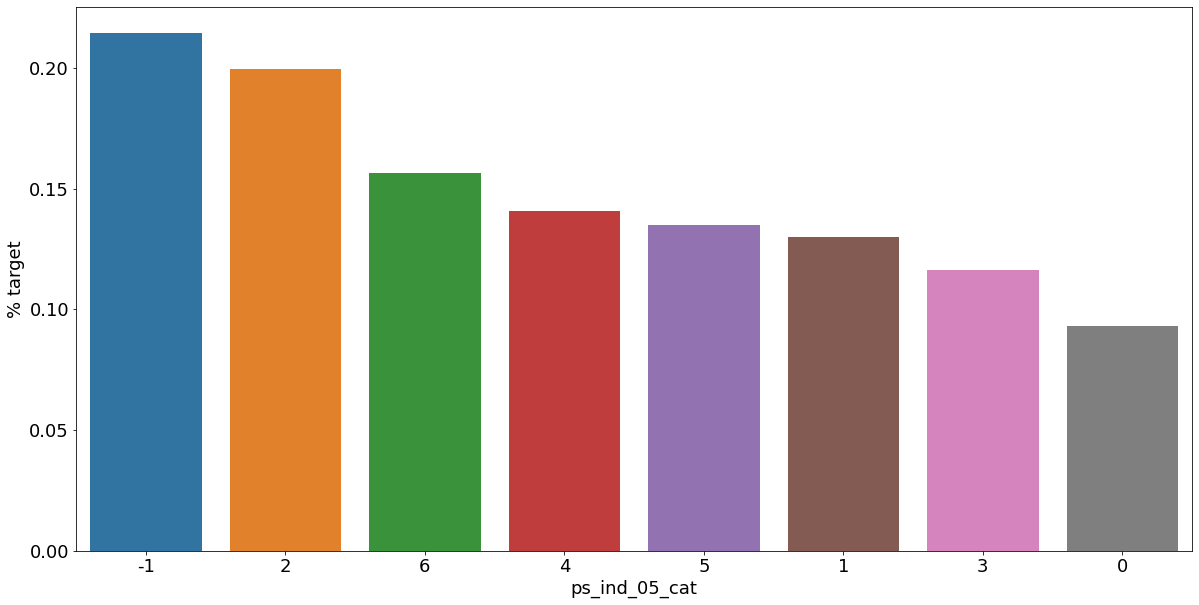

<Figure size 432x288 with 0 Axes>

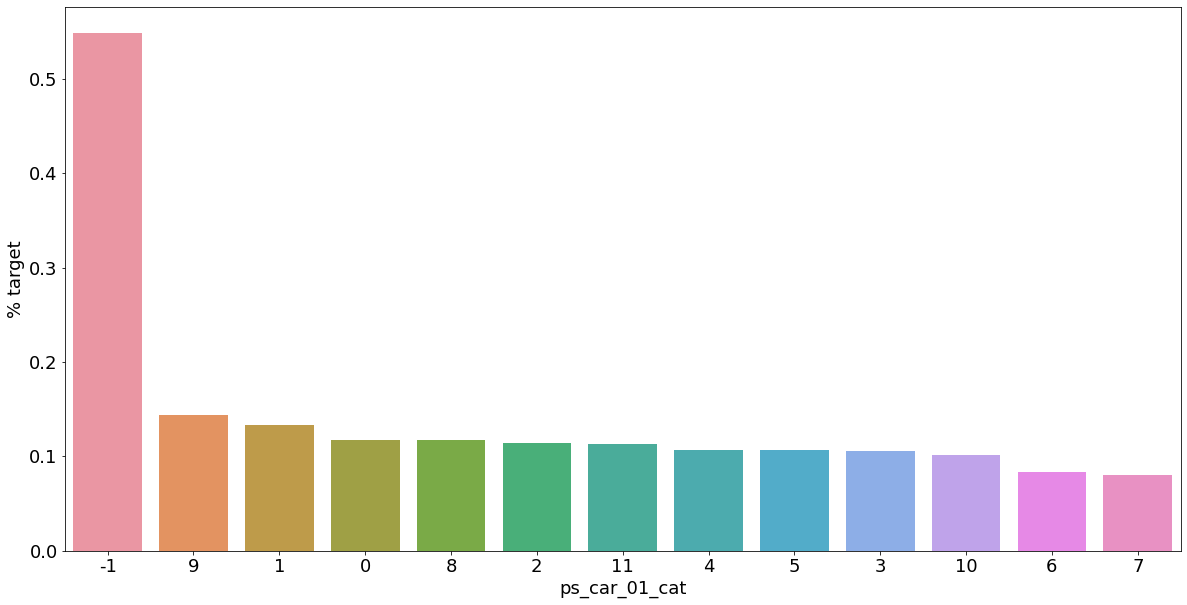

<Figure size 432x288 with 0 Axes>

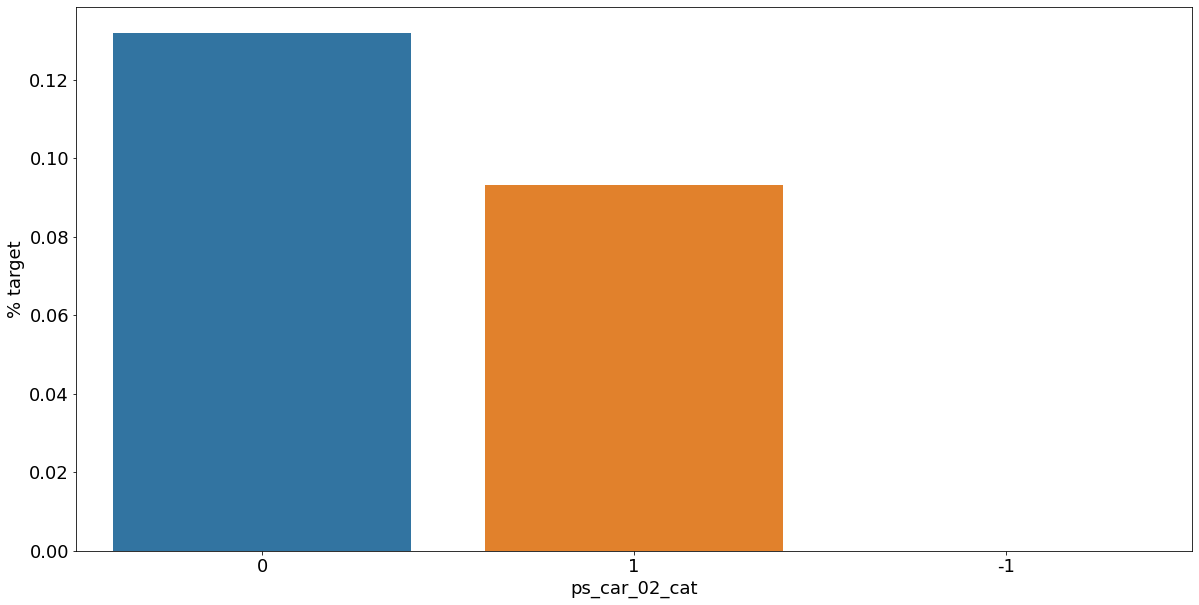

<Figure size 432x288 with 0 Axes>

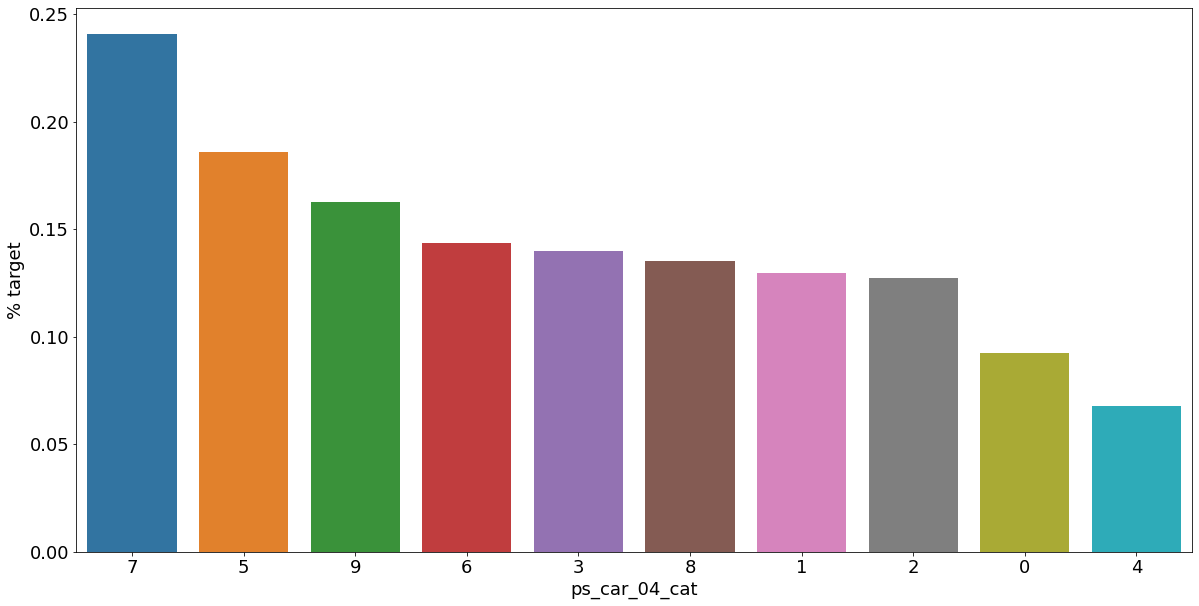

<Figure size 432x288 with 0 Axes>

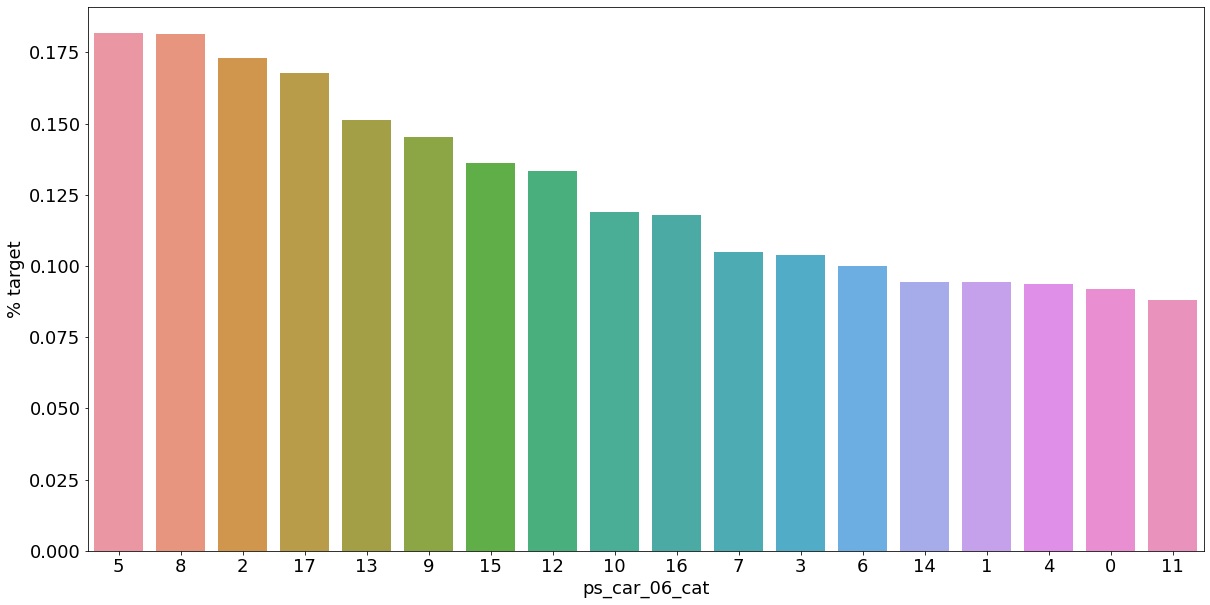

<Figure size 432x288 with 0 Axes>

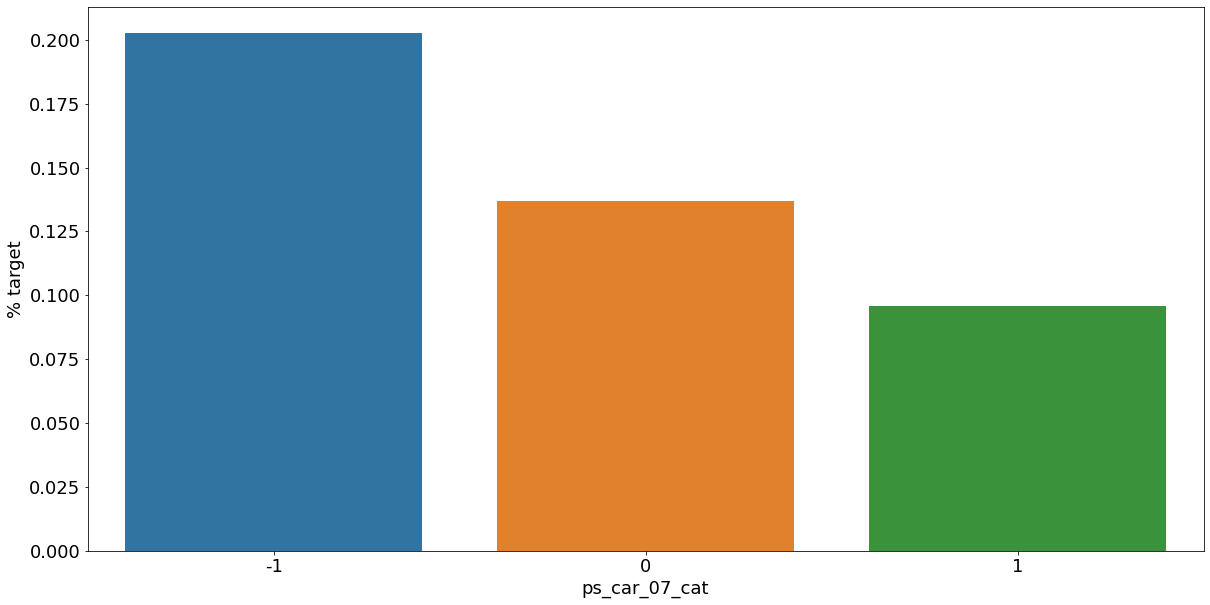

<Figure size 432x288 with 0 Axes>

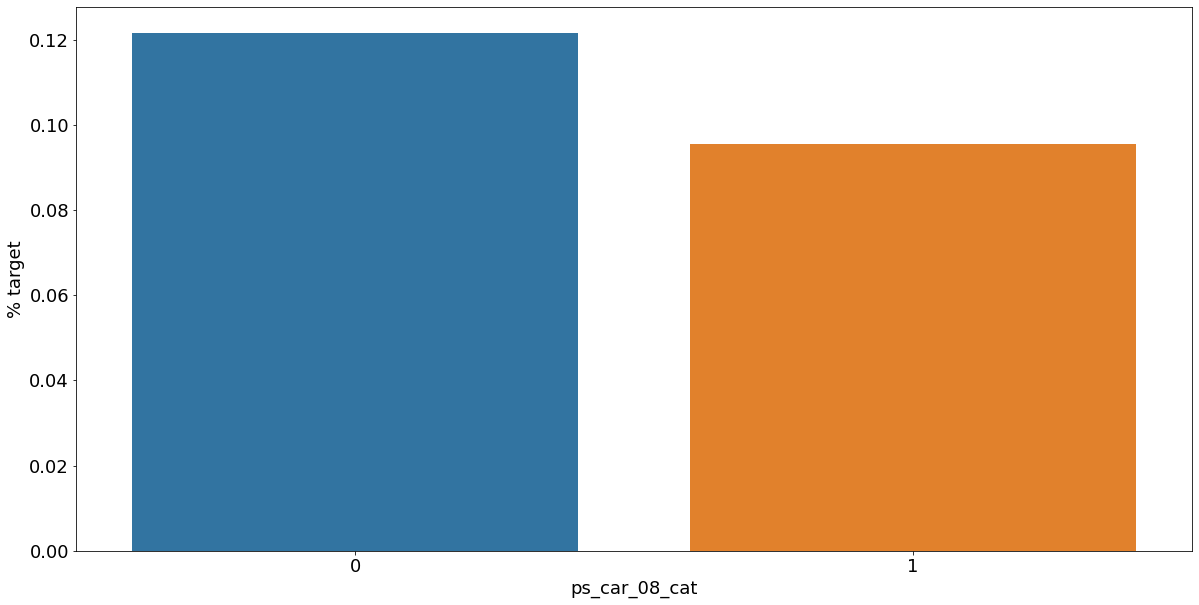

<Figure size 432x288 with 0 Axes>

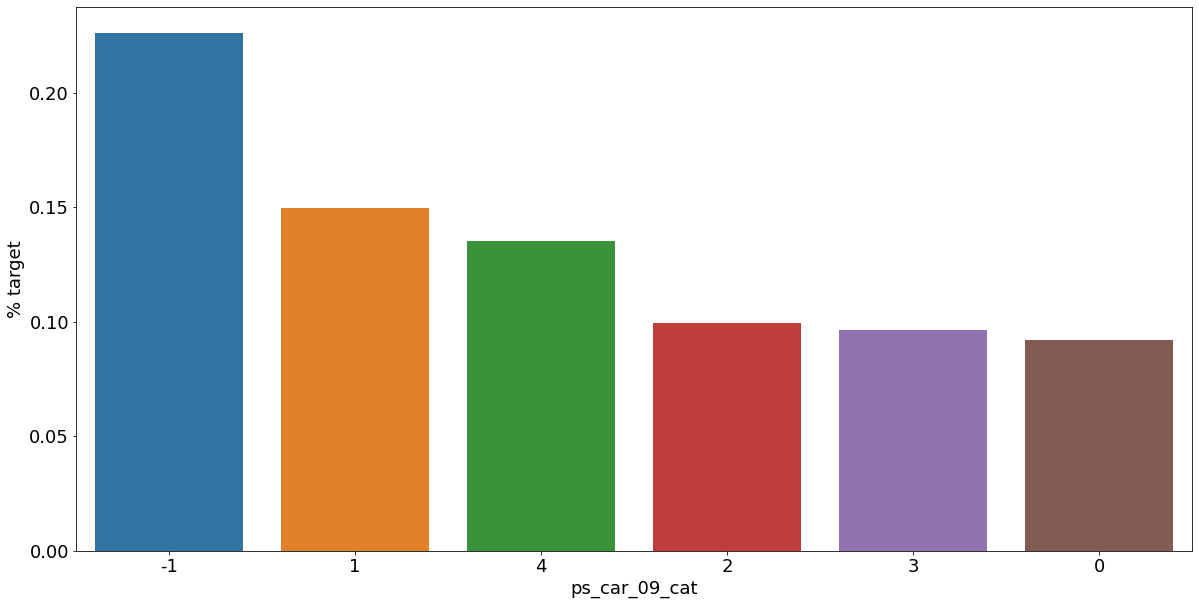

<Figure size 432x288 with 0 Axes>

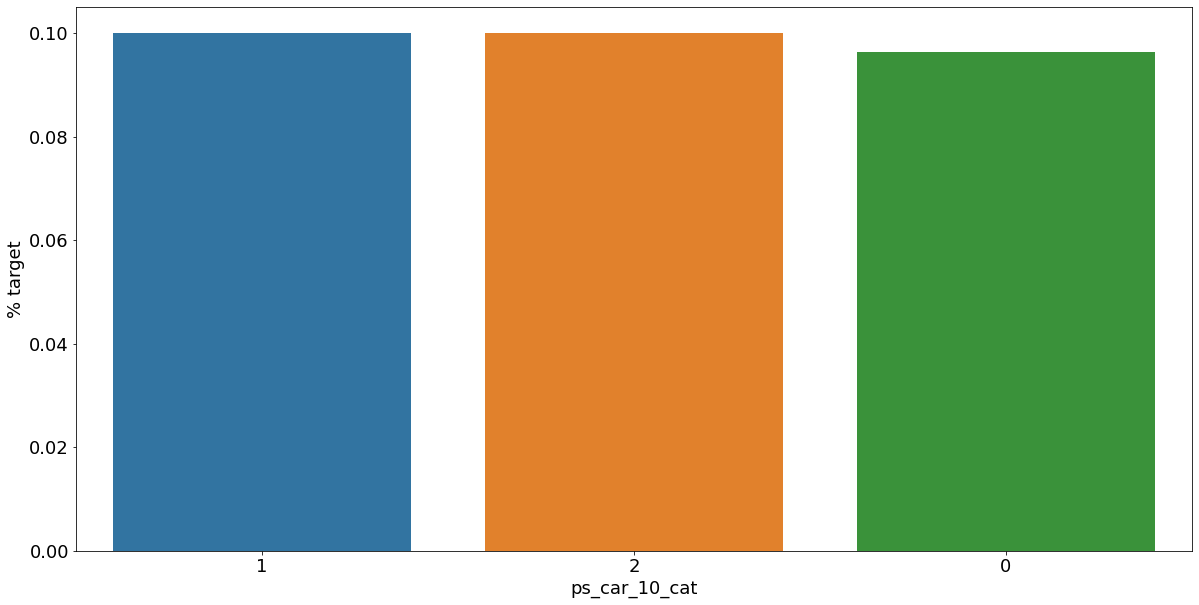

In [90]:
v = meta[(meta.level=='nominal')&(meta.keep)].index

for f in v:
    plt.figure()
    fig,ax = plt.subplots(figsize=(20,10))
    # 범주값별 target=1의 비율 계산
    cat_perc = train[[f,'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target',ascending=False,inplace=True)
    
    # Bar plot
    # target 평균의 내림차순 bar
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both',which='major',labelsize=18)
    plt.show()

결측값이 있는 변수에서 알 수 있듯이, 결측값을 최빈값으로 대체하는 것 대신, 분리된 범주값으로 유지하는 것이 좋다. 결측값이 있는 고객은 보험금을 청구할 확률이 훨씬 높은 것으로 나타난다(경우에 따라 훨씬 낮음).

## 6.2. Interval variables

구간형 변수간 상관관계를 알아보자. 히트맵은 변수간 상관관계를 시각화하기 좋다.

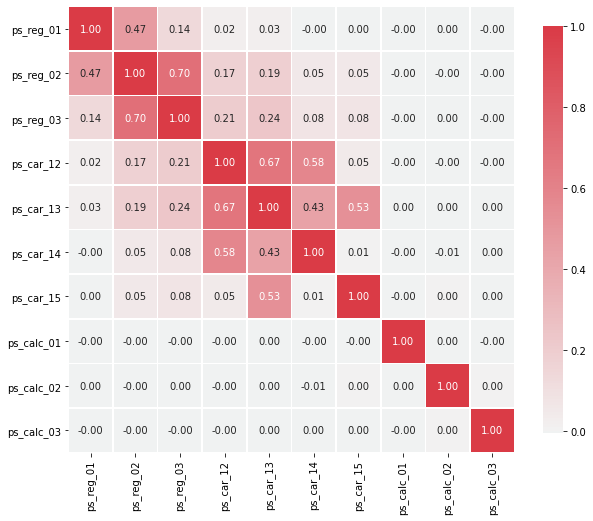

In [91]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # 두 색상 사이 범위 지정 color map 생성
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations,cmap=cmap,vmax=1.0,center=0,fmt='.2f',
               square=True,linewidths=.5,annot=True,cbar_kws={'shrink':.75})
    plt.show()
    
v = meta[(meta.level=='interval')&(meta.keep)].index
corr_heatmap(v)

다음 변수 사이에 강한 상관관계가 있다.
- ps_reg_02와 ps_reg_03 (0.70)
- ps_car_12와 ps_car_13 (0.67)
- ps_car_12와 ps_car_14 (0.58)
- ps_car_13와 ps_car_15 (0.53)

Seaborn에는 변수간 (선형) 관게를 시각화하는 데 유용한 pairplot이 있다. 하지만 heatmap은 이미 제한된 수의 상관된 변수를 표시했기 때문에 각 강한 상관관계가 있는 변수들을 개별적으로 살펴보자.<br>
참고 : 프로세스 속도를 높이기 위해 train data의 샘플을 취한다.

In [92]:
s = train.sample(frac=0.1)

### 6.2.1. ps_reg__02와 ps_reg_03

회귀선이 보여주듯 이런 변수 사이에 선형 관계가 있다. hue 파라미터를 통해 target=0과 target=1의 회귀선이 동일함을 알 수 있다.

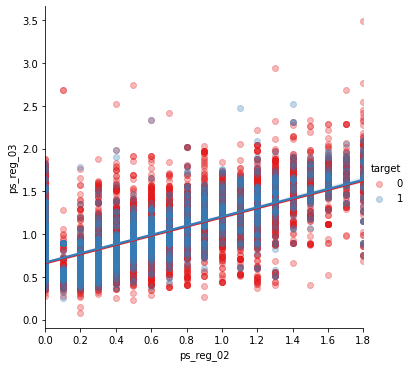

In [93]:
sns.lmplot(x='ps_reg_02',y='ps_reg_03',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

### 6.2.2 ps_car_12와 ps_car_13

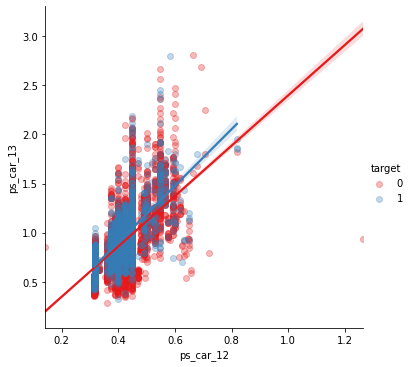

In [94]:
sns.lmplot(x='ps_car_12',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

### 6.2.3. ps_car_12와 ps_car_14

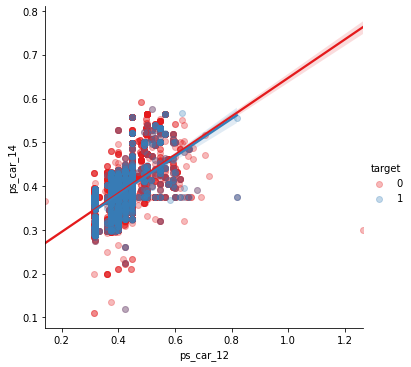

In [95]:
sns.lmplot(x='ps_car_12',y='ps_car_14',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

### 6.2.4. ps_car_13와 ps_car_15

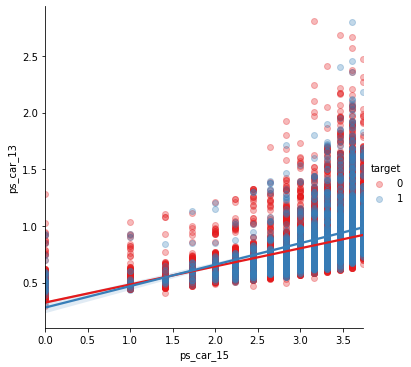

In [96]:
sns.lmplot(x='ps_car_15',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

어떤 상관 변수를 유지할지 어떻게 결정할까? 차원 축소를 위해 변수에 PCA (Principal Component Analysis)를 적용한다. 하지만 상관 변수의 수가 적어진 만큼 모델이 무거워질 것이다.

## 6.3. Checking the correlations betwwen ordinal variables

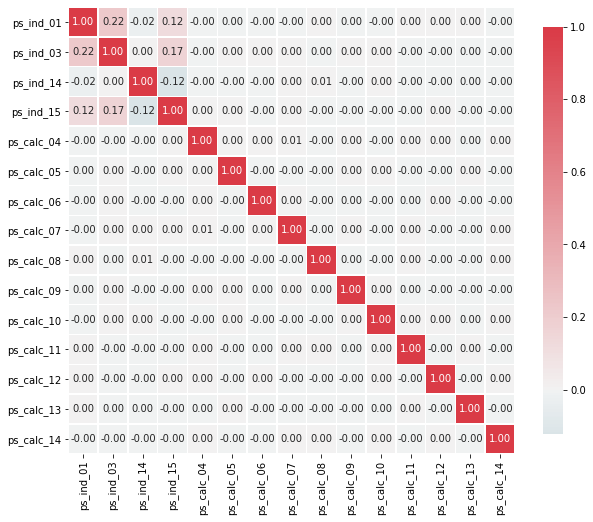

In [98]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
corr_heatmap(v)

순서형 변수는 상관관계를 볼 수 없다. 반면, target값으로 그룹화하면 분포가 어떻게 되는지 확인할 수 있다.

# 7. Feature engineering

## 7.1. Creating dummy variables

범주형 변수의 값은 순서나 크기를 나타내지 않는다. 따라서 더미 변수를 만들 수 있다. 이 정보는 원래 변수의 범주에 의해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫번째 더미 변수를 삭제한다.

In [99]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train,columns=v,drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


더미 변수가 52개 추가되었다.

## 7.1. Creating interaction variables

In [100]:
v = meta[(meta.level=='interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]),columns=poly.get_feature_names(v))
interactions.drop(v,axis=1,inplace=True)  # 원래 칼럼 삭제

# train data에 상호작용 변수 연결
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


train data에 추가 상호작용 변수가 추가되었다. get_feature_names메소드를 통해 이러한 새 변수에 열 이름을 할당할 수 있다.

# 8. Feature selection

## 8.1. Removing features with low or zero variance

개인적으로, 나(참고자료 저자)는 분류기 알고리즘이 어떤 변수를 유지할지 선택하는 것을 선호한다. 하지만 분산이 없거나 매우 낮은 변수를 제거하는 건 할 수 없다. 이를 위해 sklearn의 VarianceThreshold은 기본적으로 분산이 0인 변수를 제거한다. 이전 단계에서 분산이 0인 변수가 없는 것을 알았기 때문에 이 경우 적용되지 않는다. 그러나 1% 미만의 분산이 있는 변수를 제거하면 31개가 제거된다.

In [103]:
selector = VarianceThreshold(threshold=.01)
a = train.drop(['id','target'],axis=1)
selector.fit(a) # id와 target변수 제외 train 적합

f = np.vectorize(lambda x:not x) # boolean 어레이 요소를 변환하는 함수

v = train.drop(['id','target'],axis=1).columns[f(selector.get_support())]
print('{} variables have too low varaince.'.format(len(v)))
print('These variables are {}'.format(list(v)))

TypeError: float() argument must be a string or a number, not 'SimpleImputer'